### Reference

- https://www.instructables.com/id/Export-data-from-google-spreadsheet-in-required-CS/
- https://medium.com/bhavaniravi/python-pandas-tutorial-92018da85a33
- [Pandas API Reference](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)
- [Parsing input CSV dates](https://riptutorial.com/pandas/example/8458/parsing-date-columns-with-read-csv)
- [Convert column of dataFrame](https://stackoverflow.com/questions/17134716/convert-dataframe-column-type-from-string-to-datetime-dd-mm-yyyy-format)

### About

Import Weight Data imported from [QS Access iOS App](https://apps.apple.com/us/app/qs-access/id920297614) as CSV

In [1]:
import pandas as pd
import numpy as np
print(pd.__version__)

1.0.1


In [2]:
df = pd.read_csv("weight.csv")

In [3]:
df.head()

,Start,Finish,Weight (lb)
0,11-Dec-2017 07:00,11-Dec-2017 08:00,288.4
1,11-Dec-2017 08:00,11-Dec-2017 09:00,0.0
2,11-Dec-2017 09:00,11-Dec-2017 10:00,0.0
3,11-Dec-2017 10:00,11-Dec-2017 11:00,0.0
4,11-Dec-2017 11:00,11-Dec-2017 12:00,0.0


In [4]:
df.describe()

,Weight (lb)
count,20835.000000
mean,2.467209
std,26.287040
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,296.400000


In [5]:
cols = ["Start","Weight (lb)"]

In [6]:
df[cols]

,Start,Weight (lb)
0,11-Dec-2017 07:00,288.4
1,11-Dec-2017 08:00,0.0
2,11-Dec-2017 09:00,0.0
3,11-Dec-2017 10:00,0.0
4,11-Dec-2017 11:00,0.0
...,...,...
20830,27-Apr-2020 06:00,0.0
20831,27-Apr-2020 07:00,276.2
20832,27-Apr-2020 08:00,0.0
20833,27-Apr-2020 09:00,0.0


In [7]:
df.iloc[-10:-1]

,Start,Finish,Weight (lb)
20825,27-Apr-2020 01:00,27-Apr-2020 02:00,0.0
20826,27-Apr-2020 02:00,27-Apr-2020 03:00,0.0
20827,27-Apr-2020 03:00,27-Apr-2020 04:00,0.0
20828,27-Apr-2020 04:00,27-Apr-2020 05:00,0.0
20829,27-Apr-2020 05:00,27-Apr-2020 06:00,0.0
20830,27-Apr-2020 06:00,27-Apr-2020 07:00,0.0
20831,27-Apr-2020 07:00,27-Apr-2020 08:00,276.2
20832,27-Apr-2020 08:00,27-Apr-2020 09:00,0.0
20833,27-Apr-2020 09:00,27-Apr-2020 10:00,0.0


## get last n items

In [8]:
n = 10
df.iloc[-n:]

,Start,Finish,Weight (lb)
20825,27-Apr-2020 01:00,27-Apr-2020 02:00,0.0
20826,27-Apr-2020 02:00,27-Apr-2020 03:00,0.0
20827,27-Apr-2020 03:00,27-Apr-2020 04:00,0.0
20828,27-Apr-2020 04:00,27-Apr-2020 05:00,0.0
20829,27-Apr-2020 05:00,27-Apr-2020 06:00,0.0
20830,27-Apr-2020 06:00,27-Apr-2020 07:00,0.0
20831,27-Apr-2020 07:00,27-Apr-2020 08:00,276.2
20832,27-Apr-2020 08:00,27-Apr-2020 09:00,0.0
20833,27-Apr-2020 09:00,27-Apr-2020 10:00,0.0
20834,27-Apr-2020 10:00,27-Apr-2020 11:00,0.0


## get last n items of filtered set

In [9]:
n = 10
cols = ["Start","Weight (lb)"]
df[cols].iloc[-n:]

,Start,Weight (lb)
20825,27-Apr-2020 01:00,0.0
20826,27-Apr-2020 02:00,0.0
20827,27-Apr-2020 03:00,0.0
20828,27-Apr-2020 04:00,0.0
20829,27-Apr-2020 05:00,0.0
20830,27-Apr-2020 06:00,0.0
20831,27-Apr-2020 07:00,276.2
20832,27-Apr-2020 08:00,0.0
20833,27-Apr-2020 09:00,0.0
20834,27-Apr-2020 10:00,0.0


In [14]:
n = 10
cols = ["Start","Weight (lb)"]
weights = df[cols]
weights = weights[weights['Weight (lb)'] != 0.0]
weights['Start'] = pd.to_datetime(weights['Start'])
weights.columns = ['Date', 'Weight']
weights

,Date,Weight
0,2017-12-11 07:00:00,288.4
432,2017-12-29 07:00:00,288.4
482,2017-12-31 09:00:00,286.4
551,2018-01-03 06:00:00,283.2
599,2018-01-05 06:00:00,282.0
...,...,...
20735,2020-04-23 07:00:00,277.8
20758,2020-04-24 06:00:00,276.7
20783,2020-04-25 07:00:00,275.6
20807,2020-04-26 07:00:00,275.1


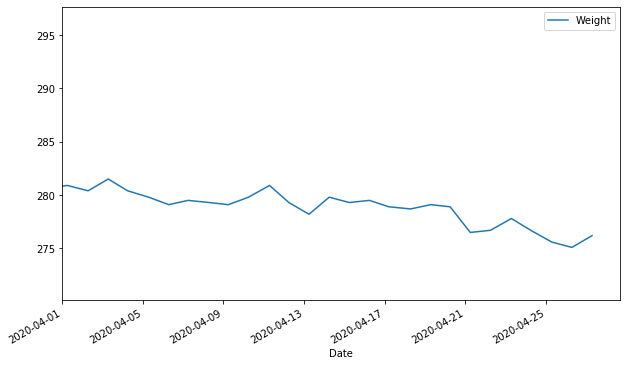

In [16]:
startDate = pd.to_datetime("April 1, 2020")
endDate = pd.Timestamp.now()
domain = (startDate,endDate)
weights.plot.line(figsize=(10,6),x = "Date", legend=True, xlim=domain)

## To Do:

- Add column to weights dataFrame of calculated trend
- plot trend and weight
- calculate linear fits and project goal target dates
    - possibly multiple models based on a range?
- make an exportable form & workflow so we can easily upload data and run report